In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

#Define Problem Statement and perform Exploratory Data Analysis

**Why this case study?**

**From company’s perspective:**

● Jamboree is a renowned educational institution that has successfully assisted numerous
students in gaining admission to top colleges abroad. With their proven
problem-solving methods, they have helped students achieve exceptional scores on
exams like GMAT, GRE, and SAT with minimal effort.

● To further support students, Jamboree has recently introduced a new feature on their
website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

● By conducting a thorough analysis, we can assist Jamboree in understanding the crucial
factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on
various variables.



**From learner’s perspective:**

● Solving this business case holds immense importance for aspiring data scientists and ML engineers.

● Building predictive models using machine learning is widely popular among the data scientists/ML engineers. By working through this case study, individuals gain hands-on experience and practical skills in the field.

● Additionally, it will enhance one's ability to communicate with the stakeholders involved in data-related projects and help the organization take better, data-driven decisions.

Assuming you’re a data scientist/ML engineer hired by Jamboree, your primary objective is to
analyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset
to construct a predictive model capable of estimating an applicant's likelihood of admission
based on the available features.

We are supposed to find the importance of predictor variables and how the model can be improved and how the business can benefit from it.

In [2]:
data = pd.read_csv('./Admission_Predict_Ver1.1.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.rename(columns = lambda x : x.strip(), inplace = True)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
data.shape

(500, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
data.drop(columns = ['Serial No.'], inplace = True)

In [13]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [15]:
for col in data.columns:
  print(col, '\n', data[col].value_counts(), '\n')

GRE Score 
 GRE Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: count, dtype: int64 

TOEFL Score 
 TOEFL Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: count, dtype: int64 

University Rating 
 University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64 

SOP 


## Outlier Detection using IQR method

In [16]:
#Calculating few more statistical measures such as 'Range', 'IQR', 'Lower Whisker' and 'Upper Whisker'

descriptive_stats = data.describe()
descriptive_stats = descriptive_stats.reindex(descriptive_stats.index.values.tolist()+['Range', 'IQR', 'Lower Whisker', 'Upper Whisker'])

for col in descriptive_stats.columns:
  descriptive_stats.loc['Range'][col] = descriptive_stats.loc['max'][col] - descriptive_stats.loc['min'][col]
  descriptive_stats.loc['IQR'][col] = descriptive_stats.loc['75%'][col] - descriptive_stats.loc['25%'][col]
  descriptive_stats.loc['Lower Whisker'][col] = descriptive_stats.loc['25%'][col] - (1.5 * descriptive_stats.loc['IQR'][col])
  descriptive_stats.loc['Upper Whisker'][col] = descriptive_stats.loc['75%'][col] + (1.5 * descriptive_stats.loc['IQR'][col])

descriptive_stats

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000
Range,50.000000,28.000000,4.000000,4.000000,4.00000,3.120000,1.000000,0.63000
IQR,17.000000,9.000000,2.000000,1.500000,1.00000,0.912500,1.000000,0.19000


In [17]:
categorical_variables = ['University Rating', 'SOP', 'LOR', 'Research']

for col in descriptive_stats.columns:
  if col not in categorical_variables:
    print(col, ':', data[(data[col] < descriptive_stats.loc['Lower Whisker'][col]) | (data[col] > descriptive_stats.loc['Upper Whisker'][col])][col].count())

GRE Score : 0
TOEFL Score : 0
CGPA : 0
Chance of Admit : 2


##Univariate Analysis

Lets see the distribution of the variables of graduate applicants.

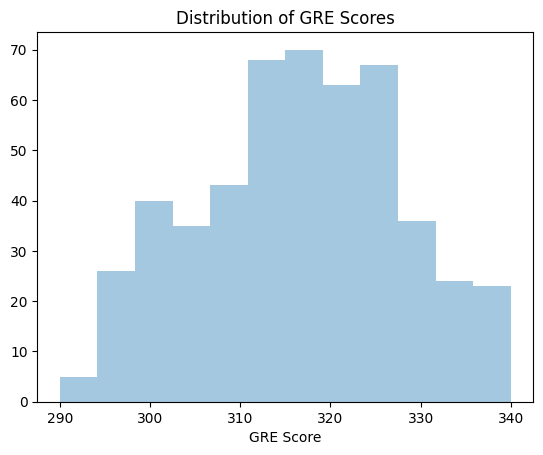

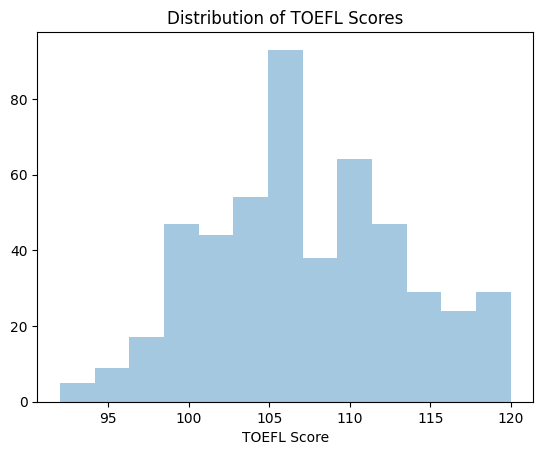

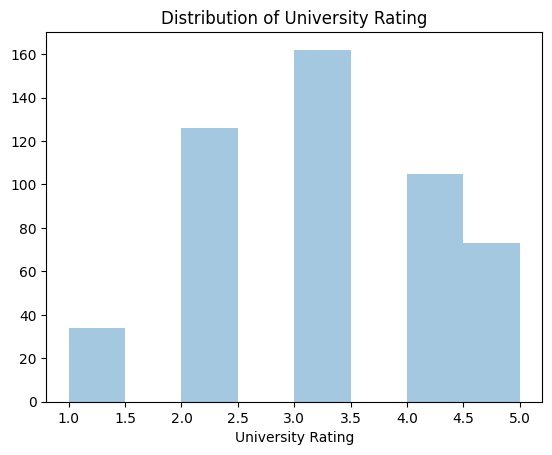

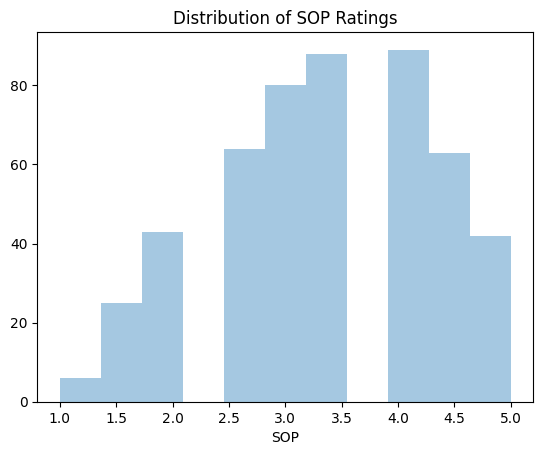

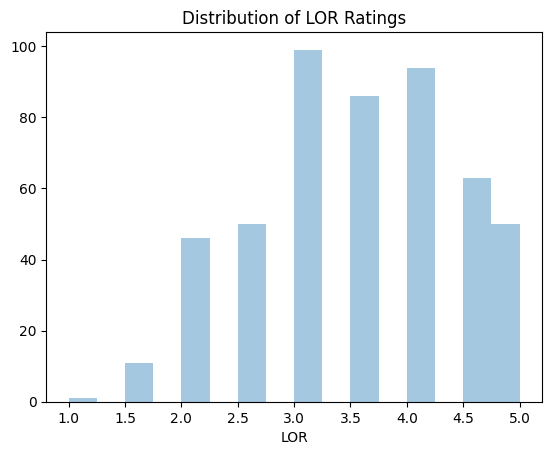

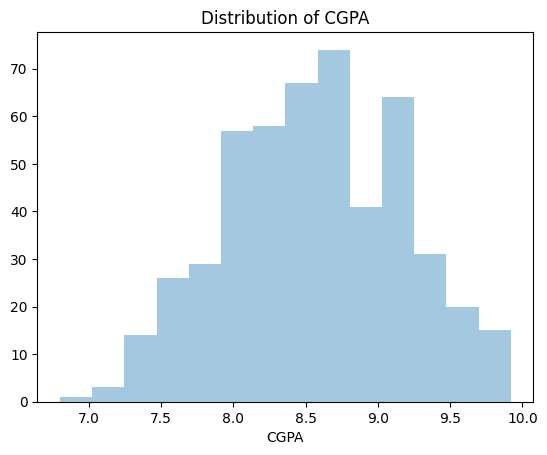

In [23]:
fig = sns.distplot(data['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(data['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(data['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(data['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(data['LOR'], kde=False)
plt.title("Distribution of LOR Ratings")
plt.show()

fig = sns.distplot(data['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.

###Continuous Variables

In [ ]:
categorical_variables = ['University Rating', 'SOP', 'LOR', 'Research']

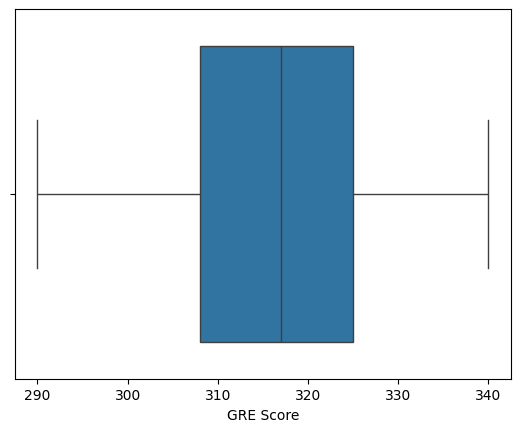

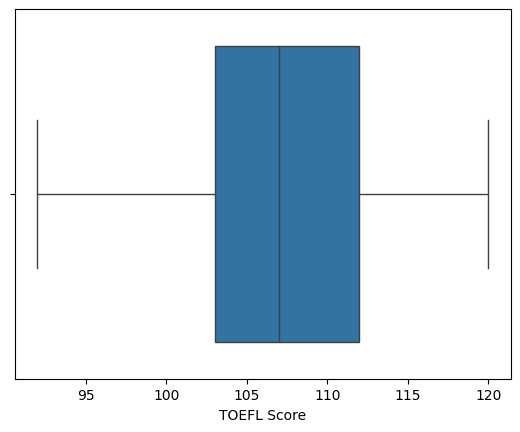

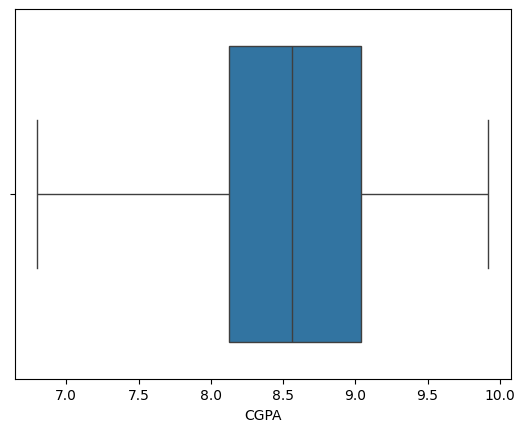

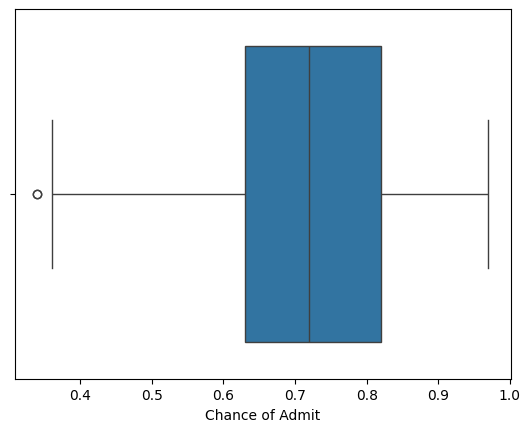

In [18]:
for col in data.columns:
  if col not in categorical_variables:
    sns.boxplot(data = data, x = col)
    plt.show()

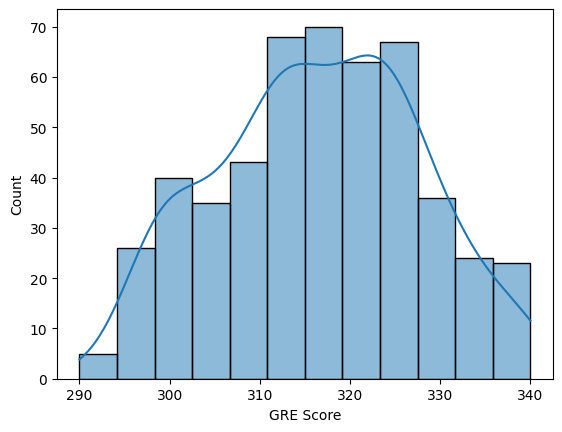

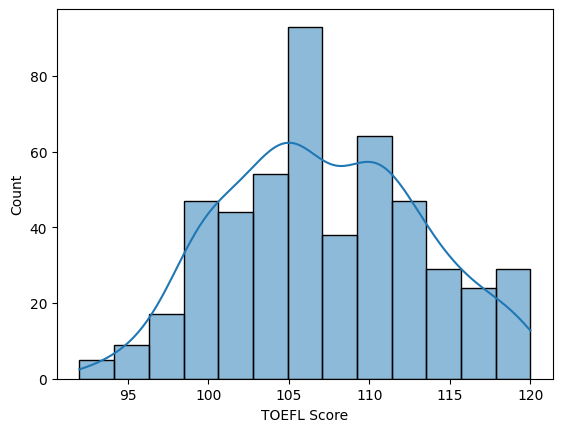

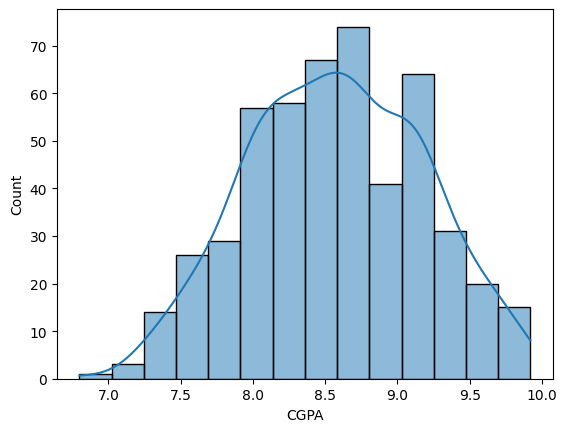

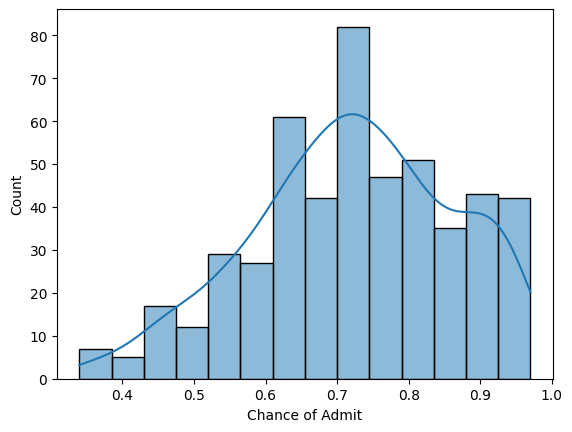

In [19]:
for col in data.columns:
  if col not in categorical_variables:
    sns.histplot(data = data, x = col, kde = True)
    plt.show()

###Categorical Variables

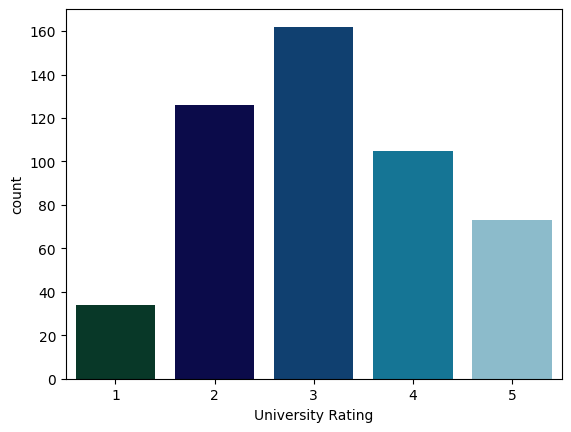

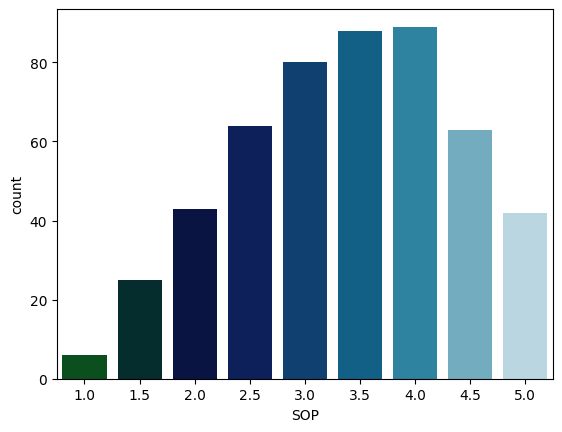

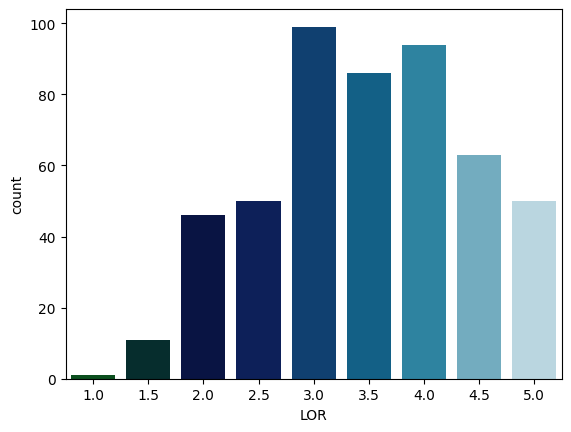

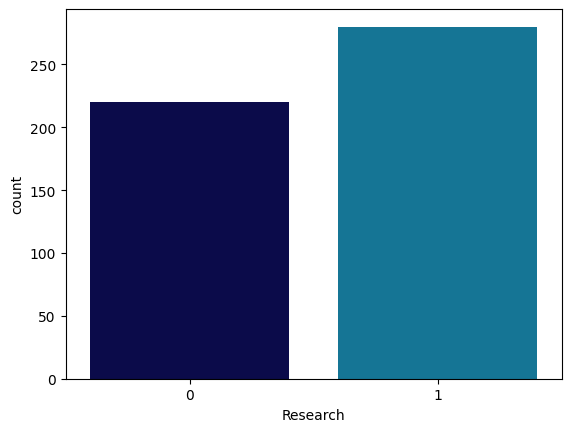

In [20]:
for col in categorical_variables:
  sns.countplot(data = data, x = col, palette = 'ocean')
  plt.show()

##Bivariate Analysis

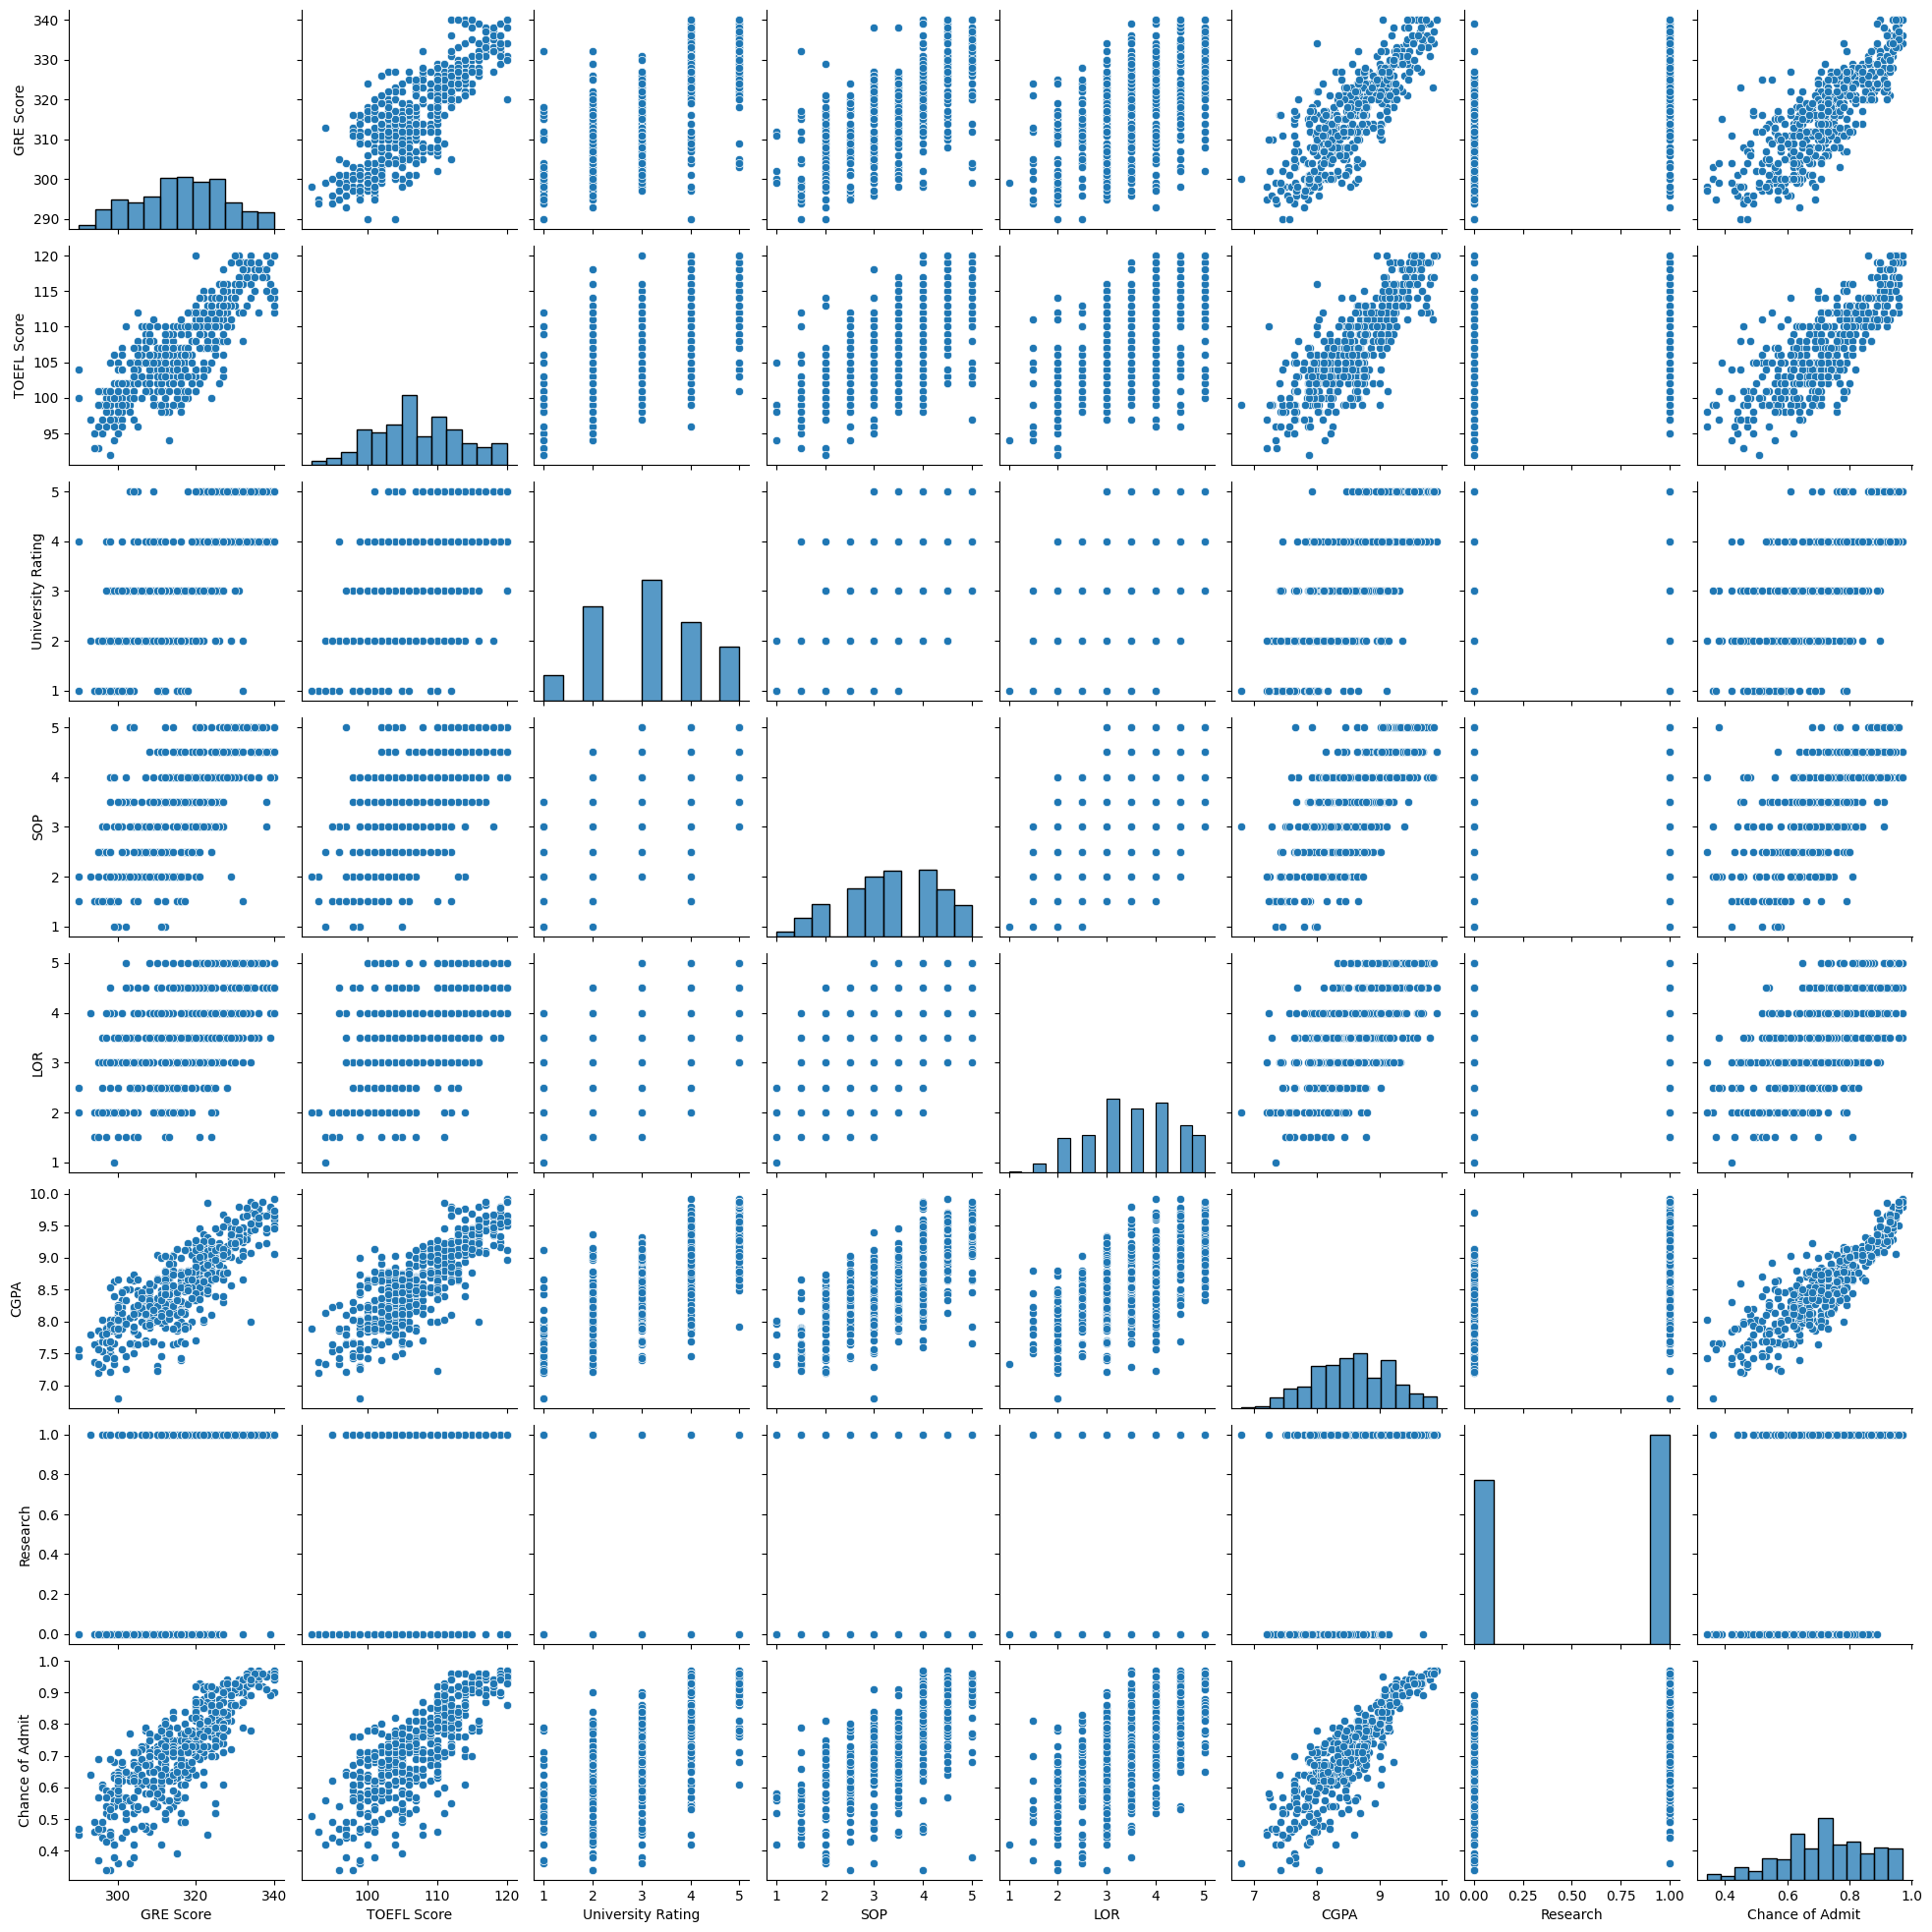

In [24]:
sns.pairplot(data)
plt.show()

###Relationship among Features

Understanding the relation between different factors responsible for graduate admissions

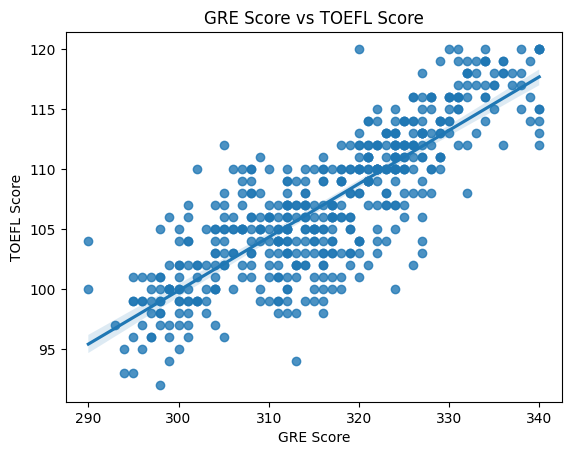

In [35]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

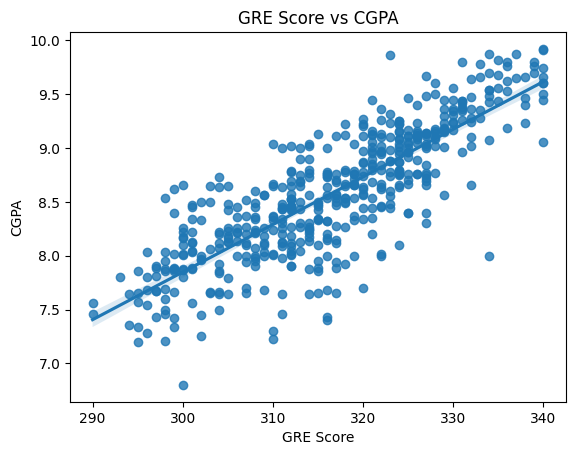

In [36]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

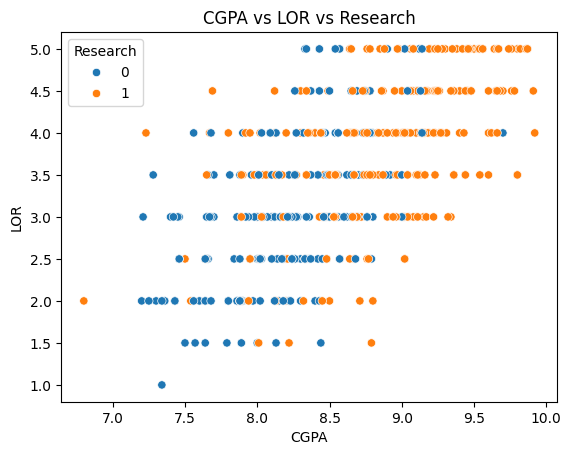

In [38]:
fig = sns.scatterplot(x="CGPA", y="LOR", data=data, hue="Research")
plt.title("CGPA vs LOR vs Research")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

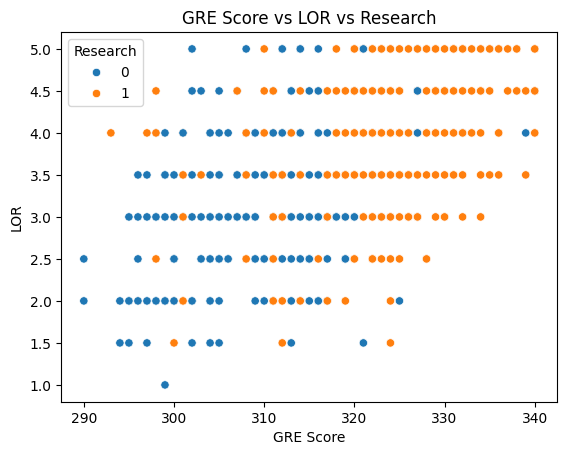

In [41]:
fig = sns.scatterplot(x="GRE Score", y="LOR", data=data, hue="Research")
plt.title("GRE Score vs LOR vs Research")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

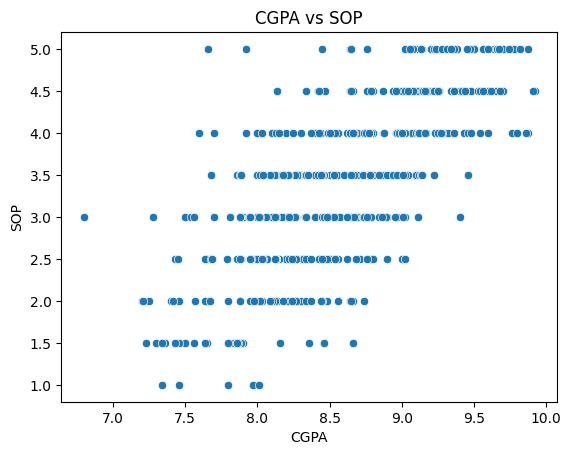

In [43]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=data)
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

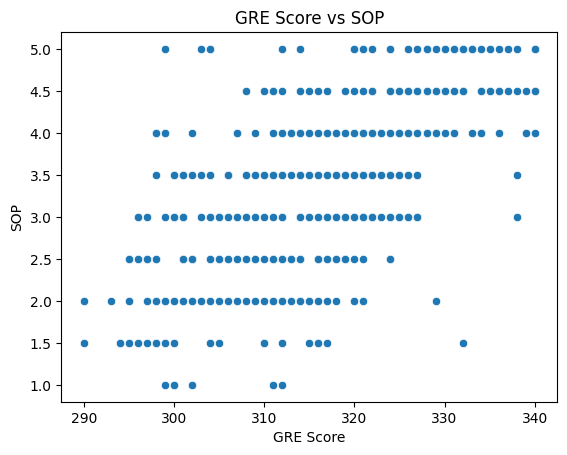

In [45]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=data)
plt.title("GRE Score vs SOP")
plt.show()

Similary, GRE Score and SOP are only slightly related

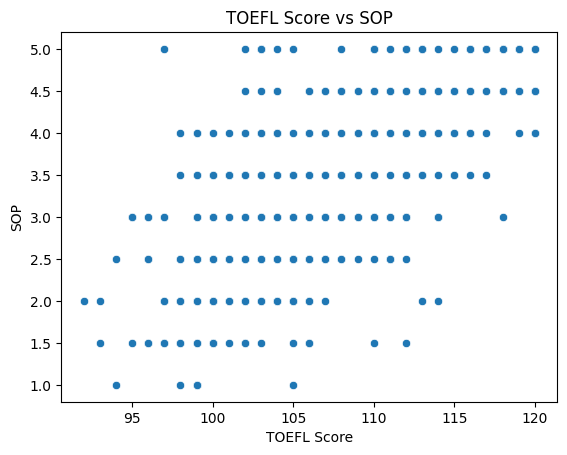

In [47]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=data)
plt.title("TOEFL Score vs SOP")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.

###Target v/s Continuous Feature (Continuous v/s Continuous)

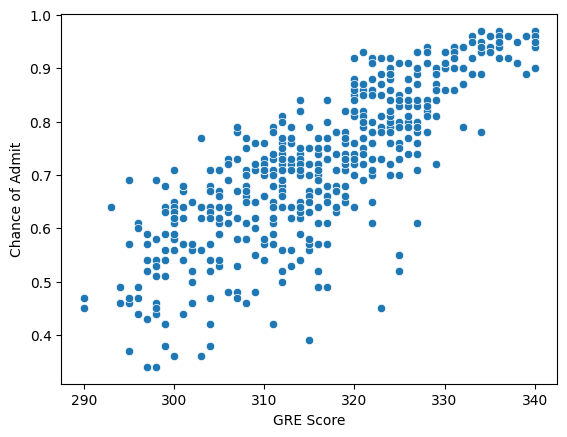

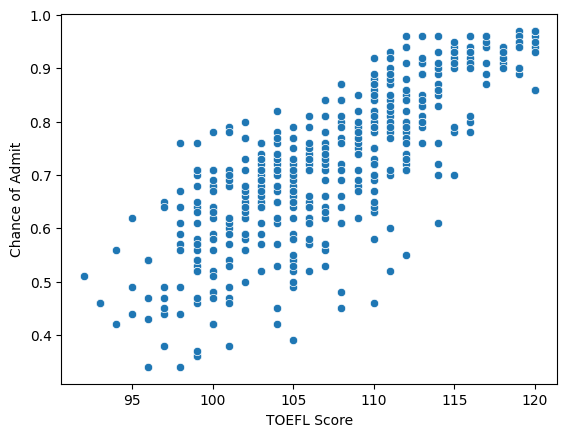

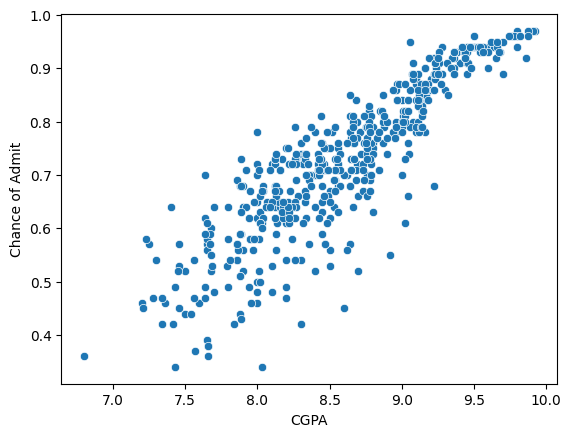

In [31]:
for col in data.columns:
  if col not in categorical_variables and col not in ('Chance of Admit'):
    sns.scatterplot(data = data, x = col, y = 'Chance of Admit')
    plt.show()

###Target v/s Categorical Features (Continuous v/s Categorical)

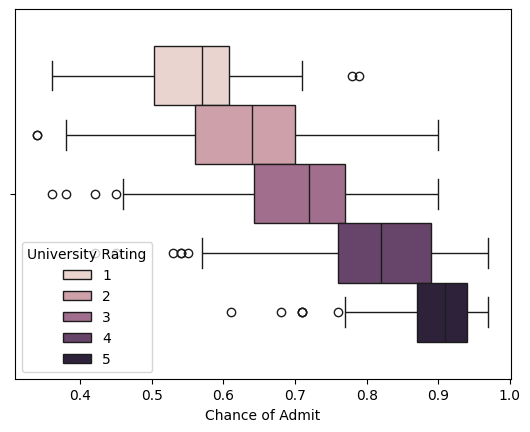

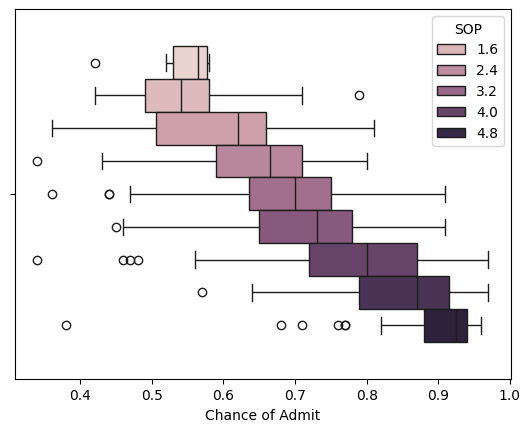

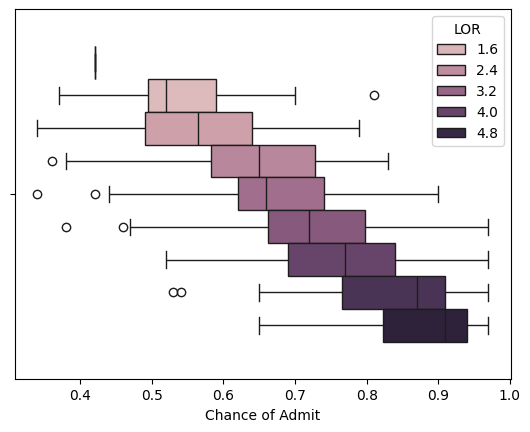

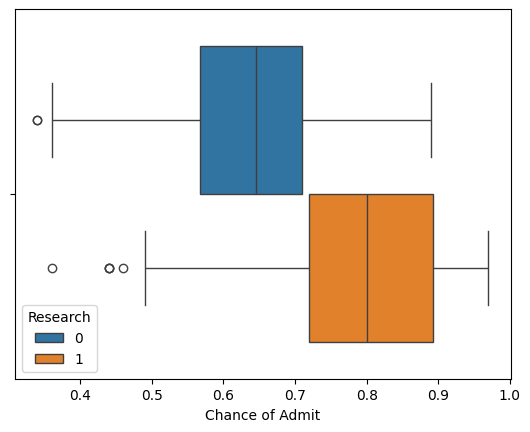

In [32]:
for col in categorical_variables:
  sns.boxplot(data = data, x = 'Chance of Admit', hue = col, orient = 'v')
  plt.show()

###Correlation using Heatmap


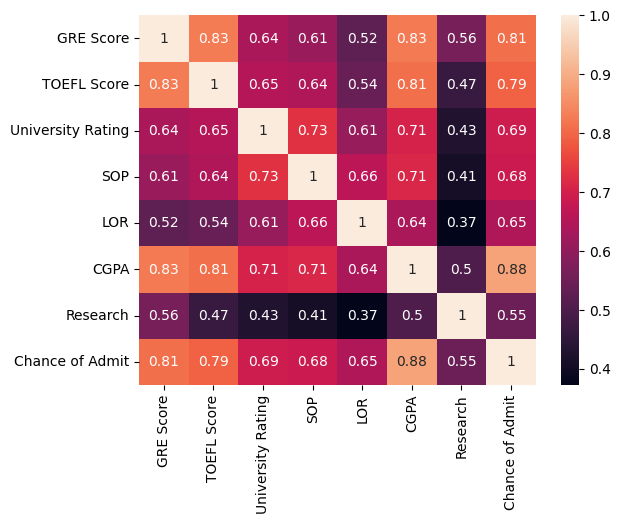

In [33]:
sns.heatmap(data.corr(), annot = True)
plt.show()

#Model Building

In [51]:
features_data = data.drop(["Chance of Admit"], axis=1)
target_data = data["Chance of Admit"]

In [52]:
features_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [53]:
target_data.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, test_size = 0.2, shuffle = True)

In [73]:
X_train.shape

(400, 7)

In [74]:
y_train.shape

(400,)

In [75]:
X_test.shape

(100, 7)

In [76]:
y_test.shape

(100,)

In [77]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
461,301,102,3,2.5,2.0,8.13,1
174,321,111,4,4.0,4.0,8.97,1
480,321,102,3,3.5,4.0,9.01,1
36,299,106,2,4.0,4.0,8.40,0
355,317,106,2,2.0,3.5,8.12,0


In [78]:
y_train.head()

461    0.68
174    0.87
480    0.80
36     0.64
355    0.73
Name: Chance of Admit, dtype: float64

In [79]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
167,313,102,3,2.0,3.0,8.27,0
428,316,103,2,2.0,4.5,8.74,0
7,308,101,2,3.0,4.0,7.90,0
68,318,109,3,3.5,4.0,9.22,1
9,323,108,3,3.5,3.0,8.60,0


In [80]:
y_test.head()

167    0.64
428    0.69
7      0.68
68     0.68
9      0.45
Name: Chance of Admit, dtype: float64

In [81]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) #for improving model interpretability
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.379657,-0.876270,-0.155682,-0.909168,-1.664896,-0.778368,0.825029
1,0.346263,0.558278,0.697371,0.585355,0.509662,0.582500,0.825029
2,0.346263,-0.876270,-0.155682,0.087180,0.509662,0.647303,0.825029
3,-1.552249,-0.238693,-1.008735,0.585355,0.509662,-0.340946,-1.212079
4,0.001079,-0.238693,-1.008735,-1.407342,-0.033977,-0.794569,-1.212079


In [82]:
y_train = y_train.reset_index(drop = True)
y_train.head()

0    0.68
1    0.87
2    0.80
3    0.64
4    0.73
Name: Chance of Admit, dtype: float64

In [83]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    0.64
1    0.69
2    0.68
3    0.68
4    0.45
Name: Chance of Admit, dtype: float64

Let's use a bunch of different algorithms to see which model performs better

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], #can try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #can try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(scaler.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Results without removing features with multicollinearity ...
Linear Regression : 0.07291444053799043
Lasso Regression : 0.11324145745248729
Ridge Regression : 0.07290273630383767


##Linear Regression using Statsmodel library


- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)


In [85]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) #Statsmodels default is without intercept, to add intercept, we need to add constant
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     312.9
Date:                Wed, 08 May 2024   Prob (F-statistic):          3.65e-156
Time:                        04:12:47   Log-Likelihood:                 586.70
No. Observations:                 400   AIC:                            -1157.
Df Residuals:                     392   BIC:                            -1125.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7310      0.00

P-value for "SOP" seems to be highest and >0.05 so let's drop that

In [86]:
X_train_new=X_train.drop(columns='SOP')

In [87]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     366.0
Date:                Wed, 08 May 2024   Prob (F-statistic):          1.86e-157
Time:                        04:14:41   Log-Likelihood:                 586.67
No. Observations:                 400   AIC:                            -1159.
Df Residuals:                     393   BIC:                            -1131.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7310      0.00

#Testing the assumptions of the linear regression model

##No Multicollinearity

VIF(Variance Inflation Factor)

- “ VIF score of an independent variable represents how well the variable is explained by other independent variables.

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [89]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.891461
2,TOEFL Score,4.226110
3,University Rating,2.229825
4,LOR,1.849678
5,CGPA,4.602324
6,Research,1.543860


VIF looks fine and hence, we can go ahead with the predictions

In [91]:
X_test_std= scaler.transform(X_test)

In [93]:
X_test=pd.DataFrame(X_test_std, columns=X_test.columns) # col name same as train datasets

In [94]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.344105,-0.876270,-0.155682,-1.407342,-0.577617,-0.551557,-1.212079
1,-0.085217,-0.716875,-1.008735,-1.407342,1.053301,0.209882,-1.212079
2,-0.775585,-1.035664,-1.008735,-0.410994,0.509662,-1.150987,-1.212079
3,0.087375,0.239490,-0.155682,0.087180,0.509662,0.987520,0.825029
4,0.518855,0.080096,-0.155682,0.087180,-0.577617,-0.016930,-1.212079


In [95]:
X_test = sm.add_constant(X_test)

In [96]:
X_test.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,-0.344105,-0.876270,-0.155682,-1.407342,-0.577617,-0.551557,-1.212079
1,1.0,-0.085217,-0.716875,-1.008735,-1.407342,1.053301,0.209882,-1.212079
2,1.0,-0.775585,-1.035664,-1.008735,-0.410994,0.509662,-1.150987,-1.212079
3,1.0,0.087375,0.239490,-0.155682,0.087180,0.509662,0.987520,0.825029
4,1.0,0.518855,0.080096,-0.155682,0.087180,-0.577617,-0.016930,-1.212079


In [98]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))
X_test_del

['SOP']

In [99]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [100]:
X_test_new=X_test.drop(columns=X_test_del)

In [101]:
X_test_new.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,-0.344105,-0.876270,-0.155682,-0.577617,-0.551557,-1.212079
1,1.0,-0.085217,-0.716875,-1.008735,1.053301,0.209882,-1.212079
2,1.0,-0.775585,-1.035664,-1.008735,0.509662,-1.150987,-1.212079
3,1.0,0.087375,0.239490,-0.155682,0.509662,0.987520,0.825029
4,1.0,0.518855,0.080096,-0.155682,-0.577617,-0.016930,-1.212079


In [102]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))


Mean Absolute Error  0.04822323585173553
Root Mean Square Error  0.07293057291936322


In [103]:
def r2_score(y, y_pred):
  num = np.sum((y-y_pred)**2)
  denom = np.sum((y-y.mean())**2)
  score = 1 - (num/denom)
  return score

def adj_r2(r2, X, y):
  adj_r_squared = 1 - (((1-r2)*(len(y)-1))/(len(y) - X.shape[1]-1))
  return adj_r_squared

In [107]:
print("R2 score ", r2_score(y_test, pred))
print("Adj R2 score ", adj_r2(r2_score(y_test, pred), X_test_new, y_test))

R2 score  0.6587167672866537
Adj R2 score  0.6327495647975948


##Mean of Residuals

In [116]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.006628840611761088


##Normality of Residuals

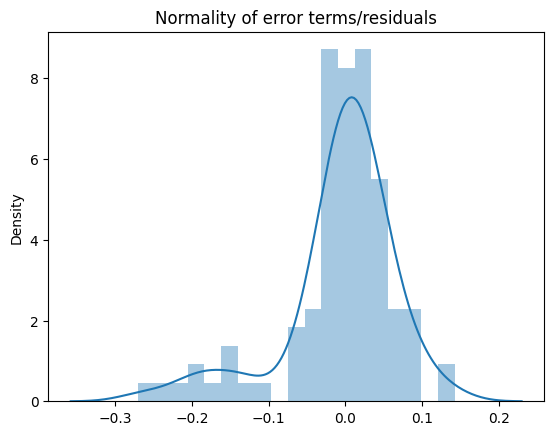

In [117]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

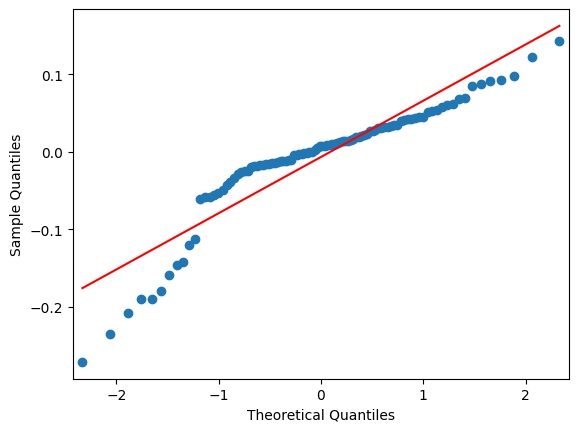

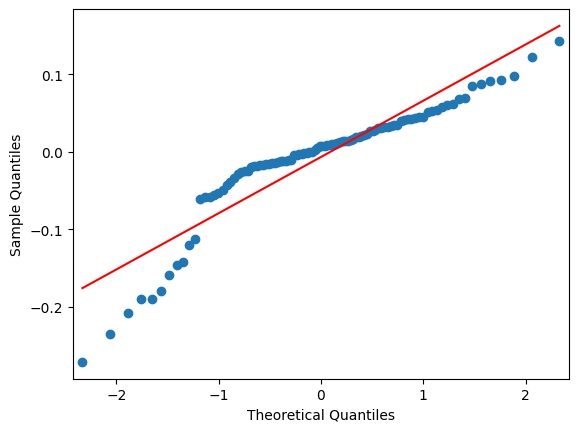

In [118]:
qqplot(residuals, line = "s")

##Test for Homoscedasticity

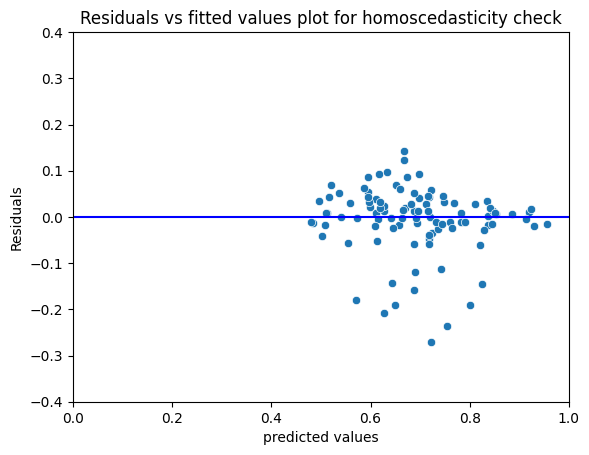

In [113]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [114]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.6722164597747095), ('p-value', 0.8988832419698937)]

Here, `null hypothesis` is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

#Model performance evaluation

##On Testing data

Text(0, 0.5, 'y_pred')

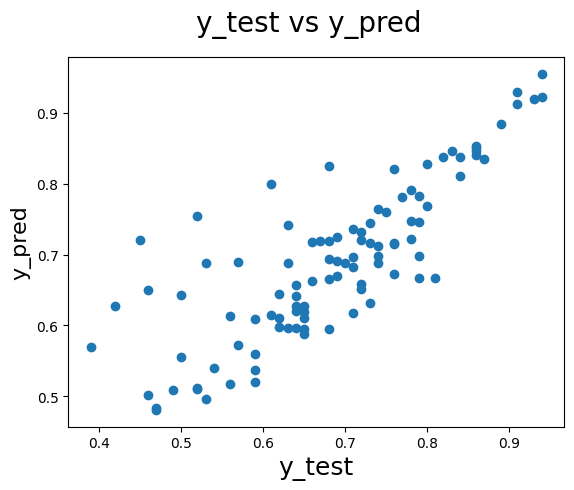

In [126]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [120]:
MAE = np.mean(y_test - pred)
MAE

-0.006628840611761088

In [121]:
MSE = np.mean(np.square(y_test - pred))
MSE

0.005318868466346557

In [122]:
RMSE = np.sqrt(MSE)
RMSE

0.07293057291936322

In [123]:
SS_res = np.mean(np.square(y_test - pred))
SS_total = np.mean(np.square(y_test - y_test.mean()))

r2_score = 1 - (SS_res/SS_total)
r2_score

0.6587167672866537

In [125]:
n, d = X_test_new.shape

adj_r2 = 1 - ((1-r2_score)*(n-1))/(n-d-1)
adj_r2

0.6327495647975948

**Bias-Variance Tradeoff**

Bias is as a result of over simplified model assumptions
Variance occurs when the assumptions are too complex
The more preferred model is one with low bias and low varinace.

Dimensionality reduction and feature selection can decrease variance by simplifying models.

Similarly, a larger training set tends to decrease variance.

For reducing Bias: Change the model, Ensure the date is truly representative(Ensure that the training data is diverse and represents all possible groups or outcomes.), Parameter tuning.

The bias–variance decomposition forms the conceptual basis for regression regularization methods such as Lasso and ridge regression.

Regularization methods introduce bias into the regression solution that can reduce variance considerably relative to the ordinary least squares (OLS) solution.

Although the OLS solution provides non-biased regression estimates, the lower variance solutions produced by regularization techniques provide superior MSE performance.

Linear and Generalized linear models can be regularized to decrease their variance at the cost of increasing their bias.

#INSIGHTS AND RECOMMENDATIONS

Insights:

1. There are 7 features in the data out of which 3 are continuous and 4 are categorical but with numeric values so no need to encode them.

2. There are no missing values, no duplicated records, no outliers present.

3. Correlation between the features is high so chance of multi-collinearity is high.

4. GRE and TOFEL scores are highly correlated. CGPA is not that correlated with LOR, Research plays huge role for higher LOR ratings. Similarly, CGPA is correlated highly with SOP as higher CGPA means higher academic excellence and that contributes to SOP. Usually students with higher CGPA have higher GRE and TOEFL scores as they are smart and hardworking so they perform better in these tests as well although that's not always true. Also, we see that students having lower CGPA can have higher LOR rating if research papers are published.

5. Chance of admit is highly correlated with GRE, TOEFL and CGPA.

6. We can see that the RMSE is almost same for Linear regression model and Ridge model but is high for Lasso we went ahead with Linear Regression.

7. We used stats models library for building the linear regression model as it gives the p-values for features which helps in deciding if features are statistically significant. SOP and University rating have p-values higher than 0.05 so they are not that useful.

8. R2 and Adj R2 are ~0.85 for model trained on training data.

9. MAE and RMSE are almost 0 for values predicted for testing data which is good.

10. We can derive that Linear Regression can be used as all the assumptions of it are held true such as distribution of data is consistent, mean of residuals is 0, residual distribution is normal, homoskedasticity is present, multi-collinearity is removed as VIF value is lesser than 5 for all features after dropping 'SOP'.

11. We can see that our trained Linear Regression model is able to predict more accurately for the y_test values greater than 0.7

Recommendations:

1. Students are recommended to have higher GRE and TOEFL scores as it increases the chance of admit.

2. Students should keep their CGPA consistently high as it helps in getting the admit. Also, it justifies in getting higher SOP rating as well.

3. Recommended to publish research papers as it enhances the LOR rating.

4. It's fine to not give much attention to university rating and SOP rating as they are not that statistically significant in increasing the chance of admit.

5. It's recommended to use hyperparameter tuning to further enhance the performance of the model.

6. We can try Ridge, Lasso or Elastic Net models to see if there's any improvement in the performance

7. We can check the model performance by dropping the 'University Rating' feature as it's having p-value greater than 0.05. We did not drop that in the solution as it's usually important for predictions.